In [1]:
import numpy as np  # numpy is for numerics, arrays, sin/cos etc.
import cmocean      # nice colormaps for climate science
import matplotlib.pyplot as plt # plotting tool
import xarray as xr # read/write netcdf and simple statistics
import cartopy.crs as ccrs # map plots

In [2]:
from dask.distributed import Client, LocalCluster, wait

In [3]:
cluster = LocalCluster(n_workers=8, threads_per_worker=2, memory_limit=32e9,
                       silence_logs=50)
client = Client(address=cluster)

In [4]:
client

Client Scheduler: tcp://127.0.0.1:33761 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 16 Memory: 256.00 GB


In [5]:
# Runs

In [6]:
nemo_dir = '/work/bb0519/b350090/models/release-4.0.1/cfgs/GYRE/'

#names = ['GYRE_R4_KEB_0','GYRE_R4_KEB_1','GYRE_R4_KEB_2','GYRE_R4_KEB_3']
#exps  = ['EXP00_R4_KEB','EXP01_R4_KEB','EXP02_R4_KEB','EXP03_R4_KEB']

names = ['GYRE_R4_KEB_0','GYRE_R4_KEB_1','GYRE_R4_KEB_2','GYRE_R4_KEB_3']
exps  = ['EXP00_R4_KEB','EXP03_R4_KEB']

tfiles = []
ffiles = []

for exp in exps:
    gyre = '%s/%s/GYRE_5d' % (nemo_dir,exp)
    print(gyre)
    ds_t = xr.open_mfdataset('%s*_grid_T.nc' % (gyre,), combine='by_coords')
    ds_f = xr.open_mfdataset('%s*_grid_F.nc' % (gyre,), combine='by_coords')
    tfiles.append(ds_t)
    ffiles.append(ds_f)


/work/bb0519/b350090/models/release-4.0.1/cfgs/GYRE//EXP00_R4_KEB/GYRE_5d
/work/bb0519/b350090/models/release-4.0.1/cfgs/GYRE//EXP03_R4_KEB/GYRE_5d


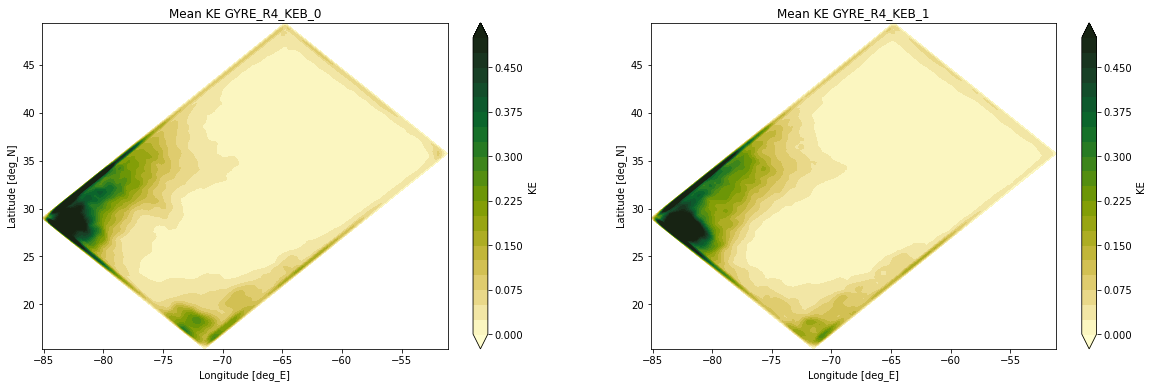

In [7]:
# Plot global mean KE
fig1, axs1 = plt.subplots(1,len(tfiles),figsize=(20,6))
ax1 = axs1.flat

for i in range(0,len(tfiles)):
    
    ds_t = tfiles[i]
    ds_f = ffiles[i]
    name  = names[i]
    
    # Mean KE
    ke_lev = np.linspace(0,0.5,21)
    cmap = cmocean.cm.speed
    x = ds_t['nav_lon'].values.flatten()
    y = ds_t['nav_lat'].values.flatten()
    z = ds_t['ke'].sel(time_counter = slice('0030-01-01T00:00:00','0040-01-01T00:00:00')).mean('time_counter')[0,:,:].values.flatten()
    cf = ax1[i].tricontourf( x, y, z,  
                             levels = ke_lev, cmap=cmap, extend='both' )
    cb = plt.colorbar(cf, ax=ax1[i])
    cb.set_label('KE')
    ax1[i].set_title('Mean KE %s' % (name,))
    ax1[i].set_xlabel('Longitude [deg_E]')
    ax1[i].set_ylabel('Latitude [deg_N]')
    
fig1.savefig('KE_mean_KEB_sensitivity.png',format='png')

In [8]:
tfiles_y = []
ffiles_y = []

for exp in exps:
    gyre = '%s/%s/GYRE_1y' % (nemo_dir,exp)
    print(gyre)
    ds_t = xr.open_mfdataset('%s*_grid_T.nc' % (gyre,), combine='by_coords')
    tfiles_y.append(ds_t)


/work/bb0519/b350090/models/release-4.0.1/cfgs/GYRE//EXP00_R4_KEB/GYRE_1y
/work/bb0519/b350090/models/release-4.0.1/cfgs/GYRE//EXP03_R4_KEB/GYRE_1y


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


KilledWorker: ("('concatenate-open_dataset-getitem-1a28c8011d9b60416ffe7b3867aab8a6', 0, 0, 0, 0)", <Worker 'tcp://127.0.0.1:35187', name: 2, memory: 0, processing: 1>)

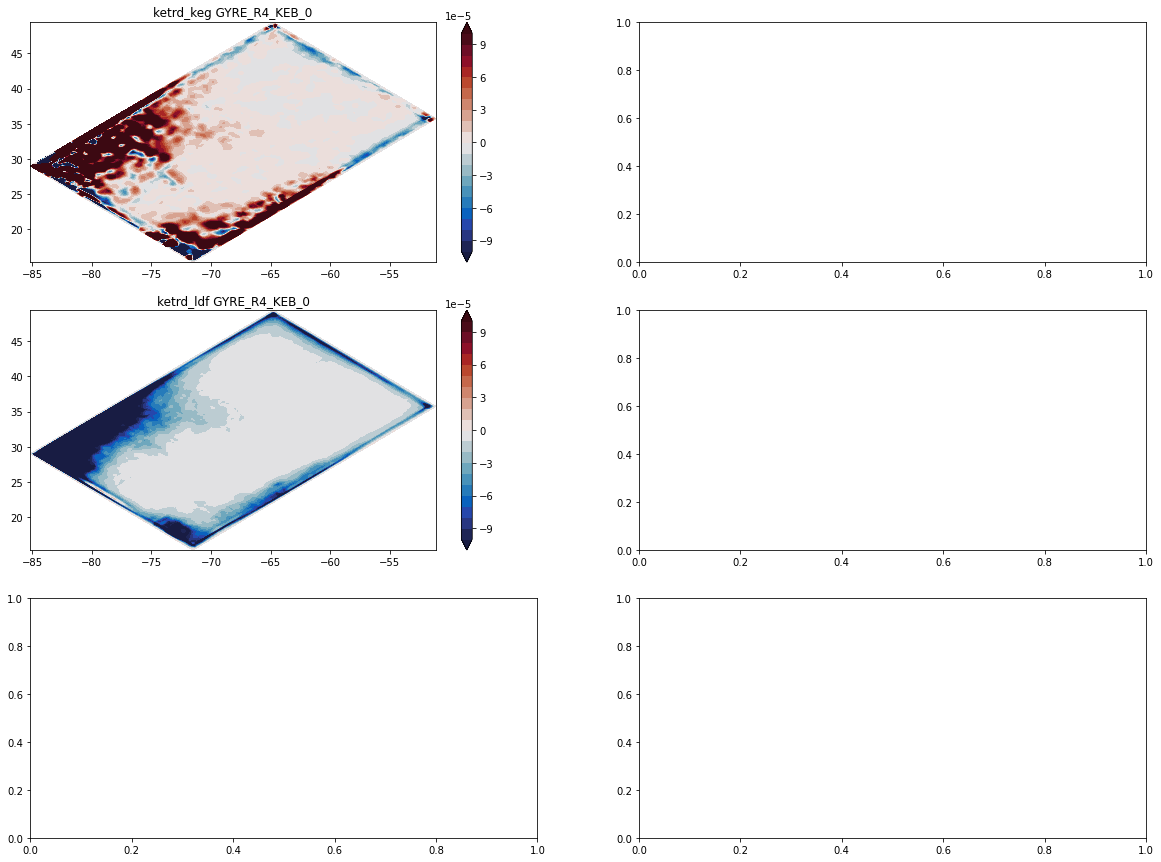

In [9]:
# Plot global mean KE
fig1, ax1 = plt.subplots(3,len(tfiles),figsize=(20,15))

for i in range(0,2):#len(tfiles)):
    
    ds_t = tfiles_y[i]
    name  = names[i]
    
    ketrd_lev = np.linspace(-1,1,21) * 1e-4
    cmap = cmocean.cm.balance
    x = ds_t['nav_lon'].values.flatten()
    y = ds_t['nav_lat'].values.flatten()
    vars = ['ketrd_keg','ketrd_ldf','ketrd_keb']
    for j in range(0,len(vars)):
        var = vars[j]
        z = ds_t[var].sel(time_counter = slice('0030-01-01T00:00:00','0040-01-01T00:00:00')).mean('time_counter')[0,:,:].values.flatten()
        print(z)
        cf = ax1[j,i].tricontourf( x,y,z,
                                   cmap=cmap, extend='both', levels=ketrd_lev )
        cb = plt.colorbar(cf, ax=ax1[j,i])
        ax1[j,i].set_title('%s %s' % (var,name))
    
#fig1.savefig('KE_timeseries.png',format='png')